<a href="https://colab.research.google.com/github/Krisilpatel/Mercedes-Benz-Challange/blob/master/MercedesBenzCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Libraries used
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
pal = sns.color_palette()


In [0]:
## Uploaded Data to google drive 
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [0]:
## Reading CSV files as Pandas Data frame
import io
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))


In [0]:
test_df.describe()



,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
y_train=train_df['y'].values

**(A) Exploratory Data Analysis**

Text(0.5,1,'Distribution of the target value')

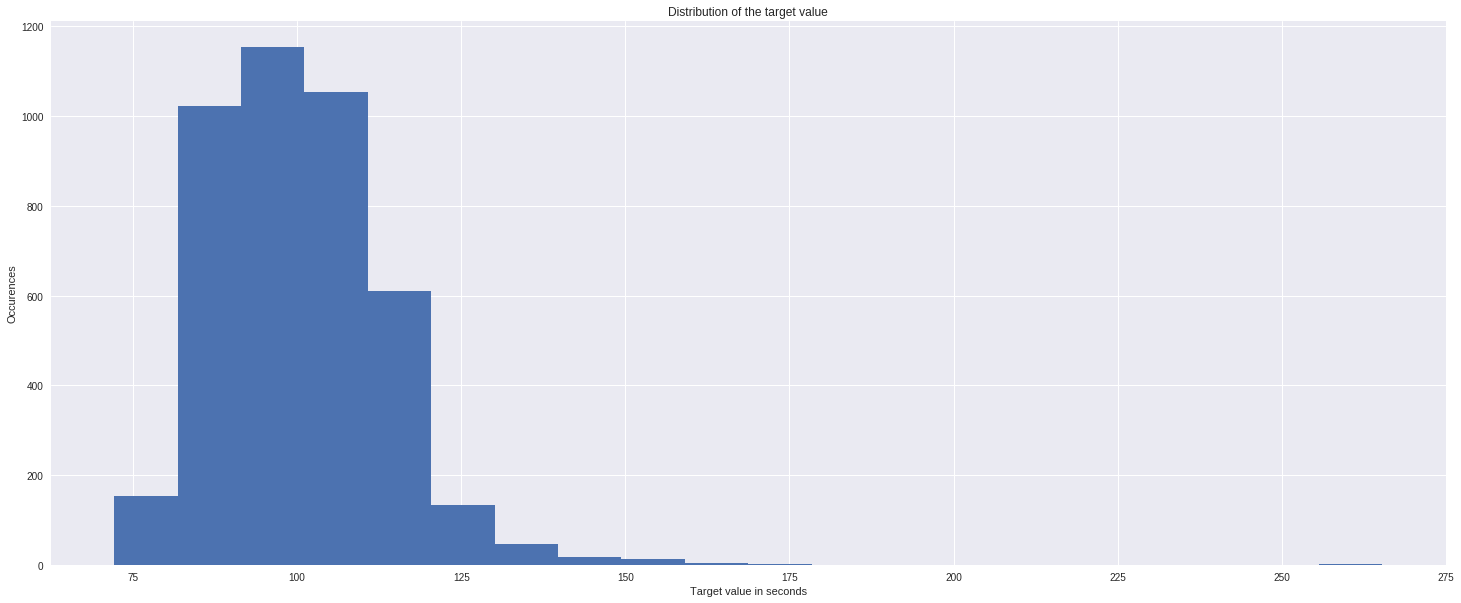

In [0]:
plt.figure(figsize=(25, 10))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

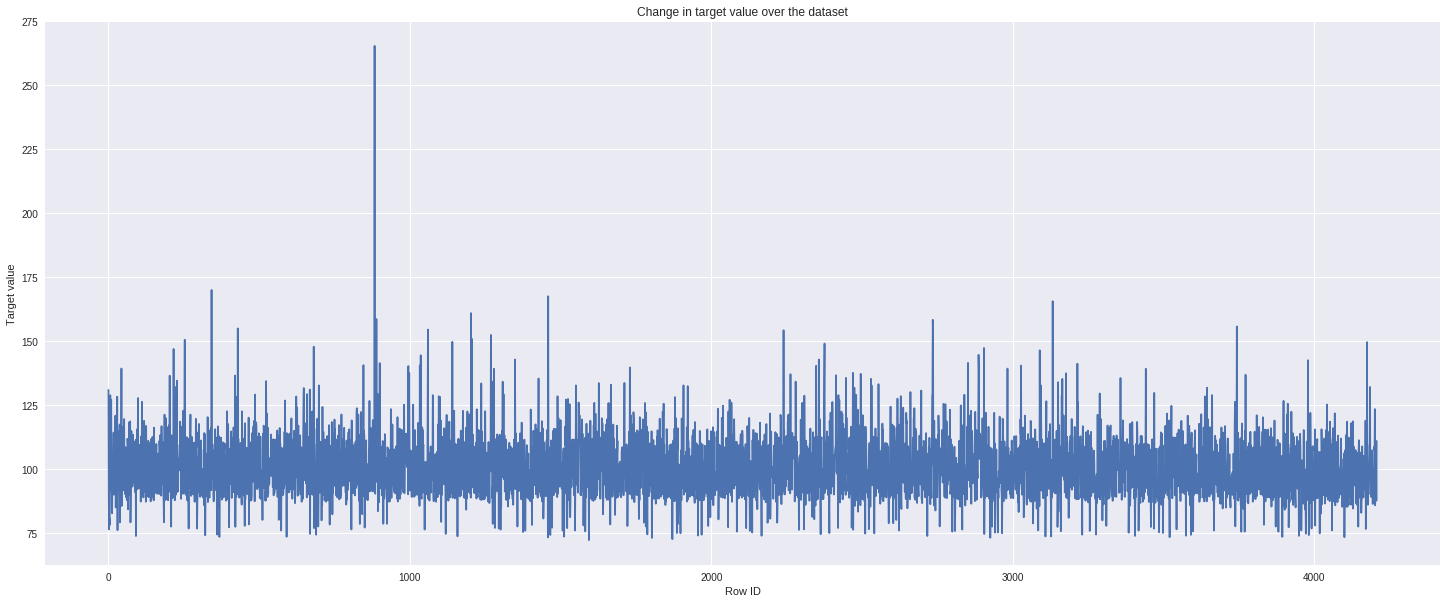

()


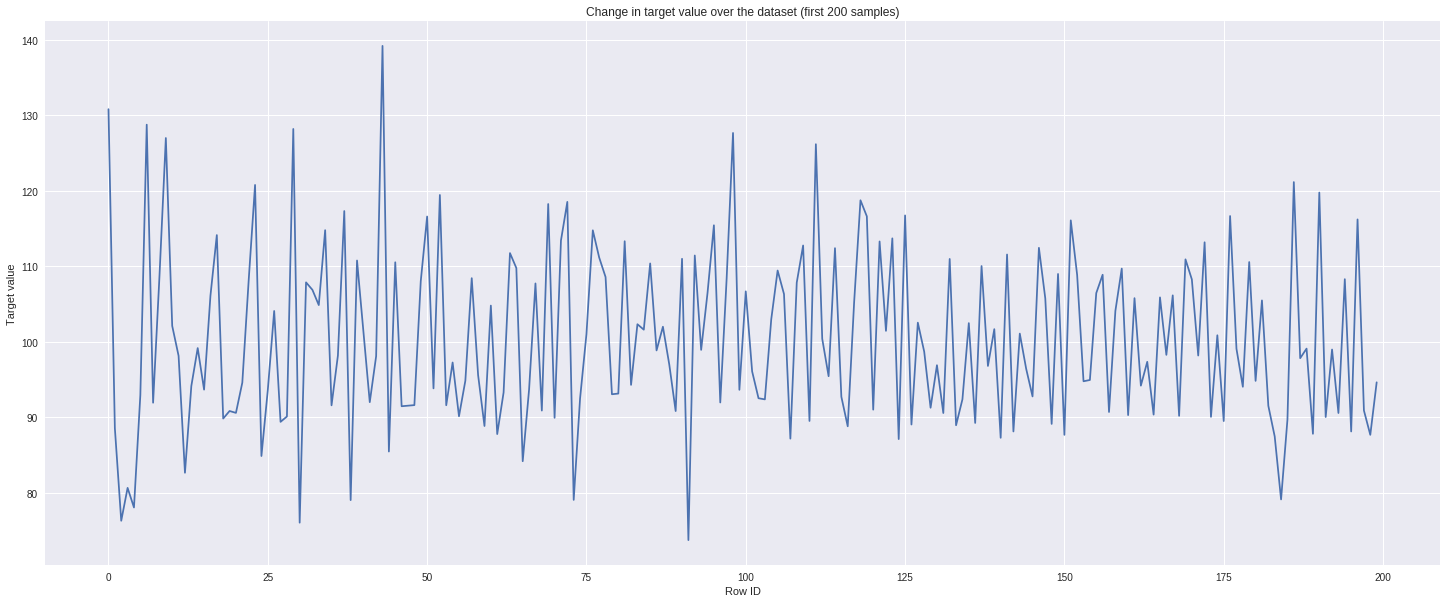

In [0]:
plt.figure(figsize=(25, 10))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

plt.figure(figsize=(25, 10))
plt.plot(y_train[:200])
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset (first 200 samples)')
print()

In [0]:
cols = [c for c in train_df.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
train_df[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [0]:
counts=[[],[],[]]
for c in cols:
  typ=train_df[c].dtype
  uq=len(np.unique(train_df[c]))
  if uq==1:
    counts[0].append(c)
  elif uq==2 and typ==np.int64:
    counts[1].append(c)
  else:
    counts[2].append(c)
  
print('Constant Attributes:', counts[0])
print('Binary Attributes:', counts[1])
print('Categorical Attributes:', counts[2])


('Constant Attributes:', ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'])
('Binary Attributes:', ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133

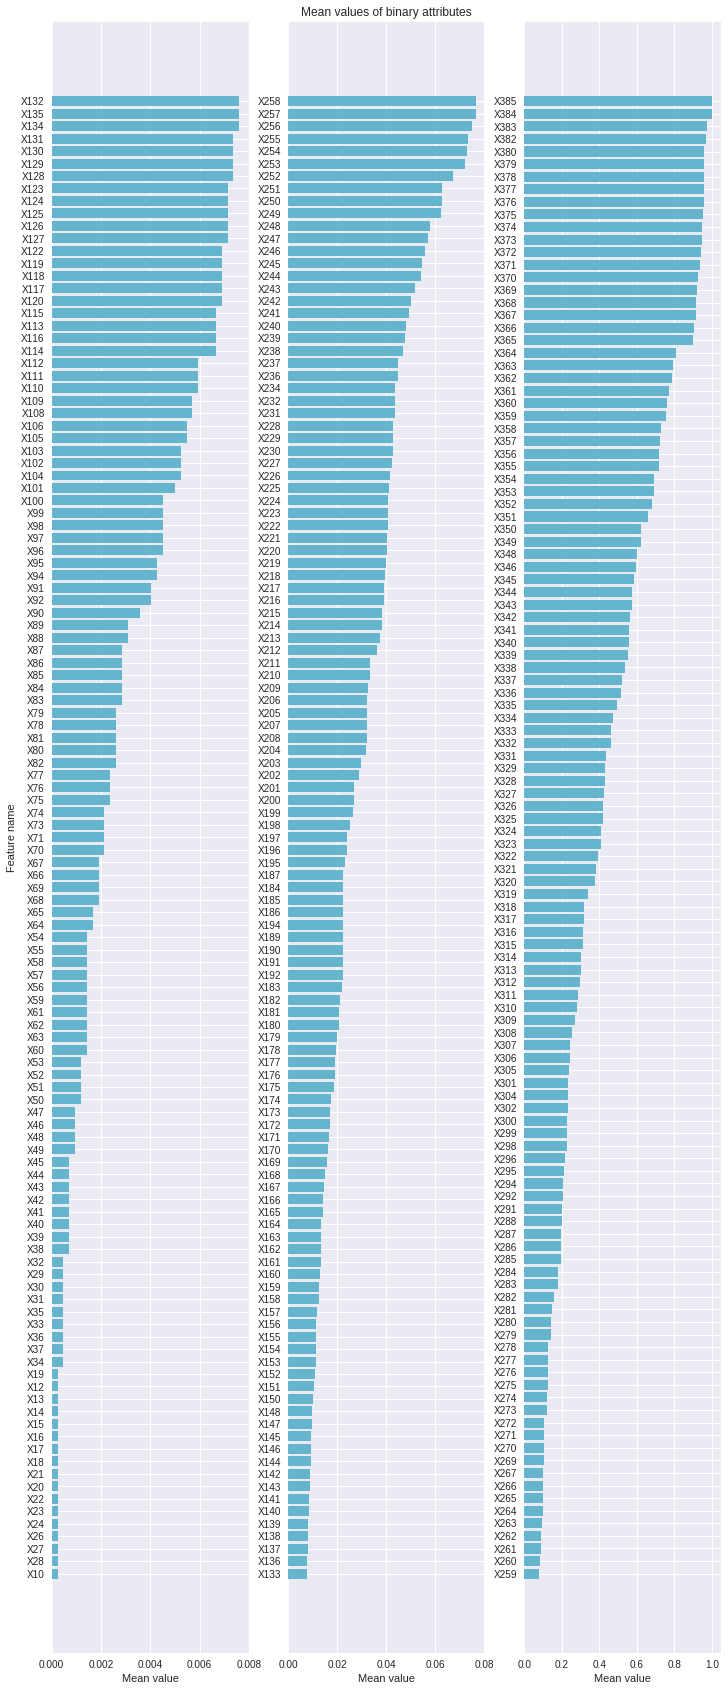

In [0]:
mean_bin=[np.mean(train_df[c]) for c in counts[1]]
mean_bin=np.sort(mean_bin)
name_bin=np.array(counts[1])[np.argsort(mean_bin)]
fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary attributes')
for i in range(3):
    names, means = name_bin[i*119:(i+1)*119], mean_bin[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[5])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

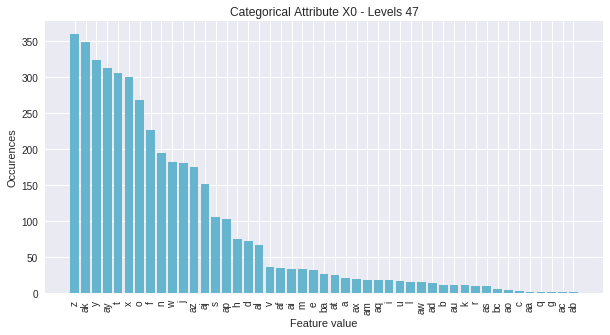

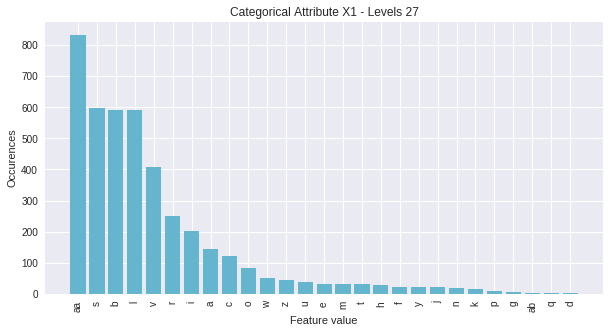

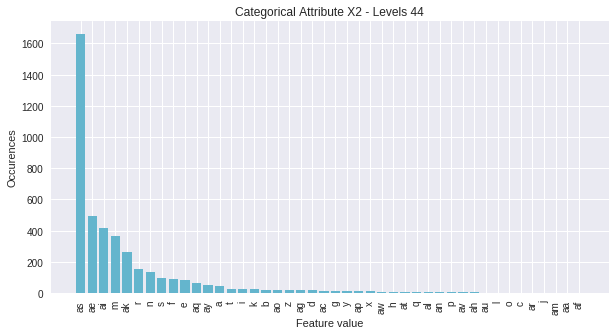

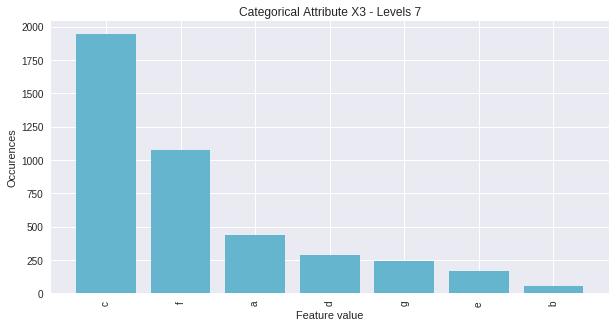

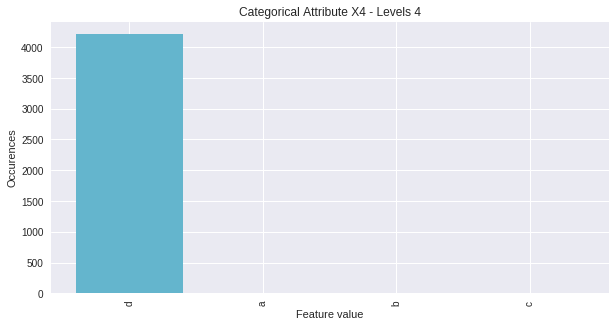

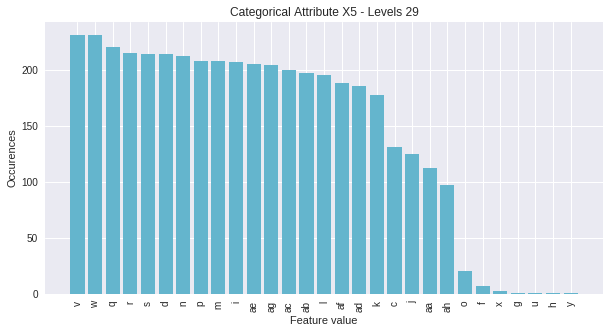

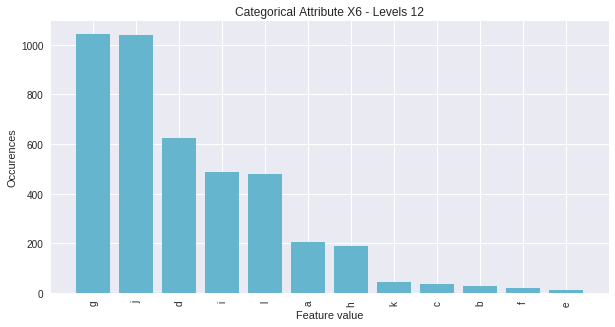

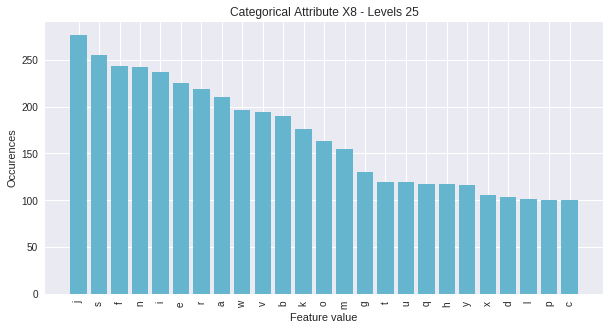

In [0]:
for c in counts[2]:
    value_counts = train_df[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical Attribute {} - Levels {}'.format(c, len(np.unique(train_df[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[5])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

**(B) XGBoost Model fitting**

In [0]:
## Selecting Attributes
att=list(set(train_df.columns) - set(['ID', 'y']))
test_id = test_df['ID'].values
x_train = train_df[att]
x_test = test_df[att]
for column in att:
    levels = len(np.unique(x_train[column]))
    if levels == 1:
        x_train.drop(column, axis=1) # Column with only one value is useless so we drop it
        x_test.drop(column, axis=1)
    if levels > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,X189,X185,X184,X187,X186,X181,X180,X183,X182,X291,...,X96,X97,X98,X99,X204,X205,X202,X203,X200,X201
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [0]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.17, random_state=7777)

d_train = xg.DMatrix(x_train, label=y_train)
d_valid = xg.DMatrix(x_valid, label=y_valid)
d_test = xg.DMatrix(x_test)
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4
def xg_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
model_xgb = xg.train(params, d_train, 1000, watchlist, early_stopping_rounds=25, feval=xgb_r2_score, maximize=True, verbose_eval=10)


[0]	train-rmse:98.657	valid-rmse:97.1825	train-r2:-63.05	valid-r2:-65.0897
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 25 rounds.
[10]	train-rmse:80.8244	valid-rmse:79.6424	train-r2:-41.9881	valid-r2:-43.386
[20]	train-rmse:66.2665	valid-rmse:65.2984	train-r2:-27.8969	valid-r2:-28.8375
[30]	train-rmse:54.3848	valid-rmse:53.6062	train-r2:-18.4634	valid-r2:-19.1089
[40]	train-rmse:44.6984	valid-rmse:44.0777	train-r2:-12.1476	valid-r2:-12.5955
[50]	train-rmse:36.815	valid-rmse:36.3259	train-r2:-7.91893	valid-r2:-8.23399
[60]	train-rmse:30.4152	valid-rmse:30.032	train-r2:-5.08759	valid-r2:-5.31141
[70]	train-rmse:25.2336	valid-rmse:24.9453	train-r2:-3.19008	valid-r2:-3.35447
[80]	train-rmse:21.0508	valid-rmse:20.8592	train-r2:-1.91608	valid-r2:-2.04475
[90]	train-rmse:17.6924	valid-rmse:17.6024	train-r2:-1.05985	valid-r2:-1.16822
[100]	train-rmse:15.0121	valid-rmse:15.0458	train-r2:-0.483022	valid-r2:-0.5

In [0]:
p_test = model_xgb.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = test_id
sub['y'] = p_test
sub.to_csv('MercedesBenzSubmission.csv', index=False)